In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Social_Network_Ads.csv']))

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [6]:
df.shape

(400, 5)

In [7]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [9]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

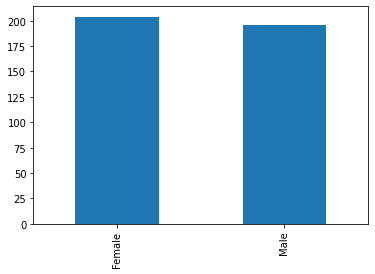

In [11]:
df['Gender'].value_counts().plot.bar()

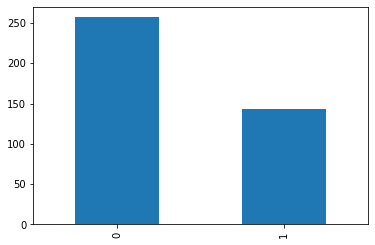

In [12]:
df['Purchased'].value_counts().plot.bar()

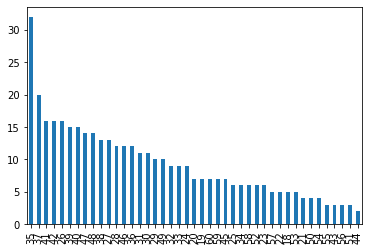

In [13]:
df['Age'].value_counts().plot.bar()

In [14]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
df['Gender'] = df['Gender'].replace({'Male':0, 'Female':1})

In [16]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [21]:
df = df.drop(['User ID'], axis=1)

In [22]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [23]:
X = df.drop(['Purchased'], axis=1)
y = df['Purchased']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state=42) 

classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_pred = classifier.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)

In [34]:
print(cm)

[[47  4]
 [ 4 25]]


In [36]:
classifier.score(X_train,y_train)

0.840625

In [37]:
classifier.score(X_test,y_test)

0.9

In [41]:
import pickle
file = open('logistic.pkl', 'w')
pickle.dump(df, file)
file.close()

TypeError: ignored

In [40]:
|from google.colab import files
files.download('logistic.pkl’)

SyntaxError: ignored